# T-test

### One-Sample T-Test

Imagine you are a data scientist at a company that manufactures light bulbs. The production team claims that the average lifespan of their new light bulbs is 1500 hours. However, you suspect that the actual average lifespan is different. To test this, you take a random sample of 20 light bulbs and measure their lifespans.

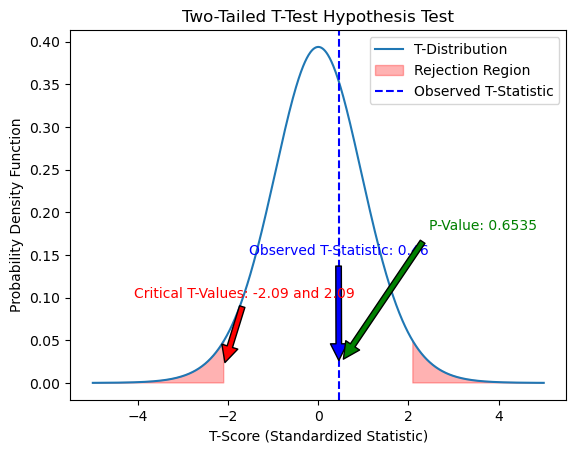

Fail to reject the null hypothesis: There is not enough evidence to conclude that the average lifespan is different from 1500 hours.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Null Hypothesis (H0): The true mean lifespan (μ) is equal to 1500 hours.
# Alternative Hypothesis (H1): The true mean lifespan (μ) is not equal to 1500 hours.

# Given data
sample_lifespans = np.array([1480, 1515, 1490, 1502, 1488, 1505, 1512, 1498, 1485, 1505,
                             1520, 1492, 1508, 1496, 1510, 1495, 1502, 1498, 1506, 1515])

# Hypothesized mean
hypothesized_mean = 1500

# Calculate the T-Statistic
t_statistic, p_value = stats.ttest_1samp(sample_lifespans, hypothesized_mean)

# Determine Critical Values
alpha = 0.05
t_critical_upper = stats.t.ppf(1 - alpha/2, df=len(sample_lifespans)-1)
t_critical_lower = -t_critical_upper

# Generate data for the t-distribution
x = np.linspace(-5, 5, 1000)
y = stats.t.pdf(x, df=len(sample_lifespans)-1)

# Plot the t-distribution
plt.plot(x, y, label='T-Distribution')

# Shade the rejection regions for a two-tailed test
plt.fill_between(x, y, where=(x < t_critical_lower) | (x > t_critical_upper),
                 color='red', alpha=0.3, label='Rejection Region')

# Plot the observed t-statistic
plt.axvline(x=t_statistic, color='blue', linestyle='--', label='Observed T-Statistic')

# Add labels and title
plt.title('Two-Tailed T-Test Hypothesis Test')
plt.xlabel('T-Score (Standardized Statistic)')
plt.ylabel('Probability Density Function')

# Add annotations for t-score, critical values, p-value, and alpha
plt.annotate(f'Observed T-Statistic: {t_statistic:.2f}', xy=(t_statistic, 0.02), xytext=(t_statistic - 2, 0.15),
             arrowprops=dict(facecolor='blue', shrink=0.05), color='blue')
plt.annotate(f'Critical T-Values: {t_critical_lower:.2f} and {t_critical_upper:.2f}',
             xy=(t_critical_lower, 0.02), xytext=(t_critical_lower - 2, 0.1),
             arrowprops=dict(facecolor='red', shrink=0.05), color='red')
plt.annotate(f'P-Value: {p_value:.4f}', xy=(t_statistic, 0.02), xytext=(t_statistic + 2, 0.18),
             arrowprops=dict(facecolor='green', shrink=0.05), color='green')

# Display the legend
plt.legend()

# Display the plot
plt.show()

# Conclusion based on p-value and alpha
if p_value < alpha:
    print(f"Reject the null hypothesis: There is enough evidence to suggest that the average lifespan is different from {hypothesized_mean} hours.")
else:
    print(f"Fail to reject the null hypothesis: There is not enough evidence to conclude that the average lifespan is different from {hypothesized_mean} hours.")


A company manufactures car batteries with an average life span of 2 or more years. An engineer believes this value to be less. Using 10 samples, he measures the average life span to be 1.8 years with a standard deviation of 0.15. (a) State the null and alternative hypotheses. (b) At a 99% confidence level, is there enough evidence to discard the null hypothesis?a

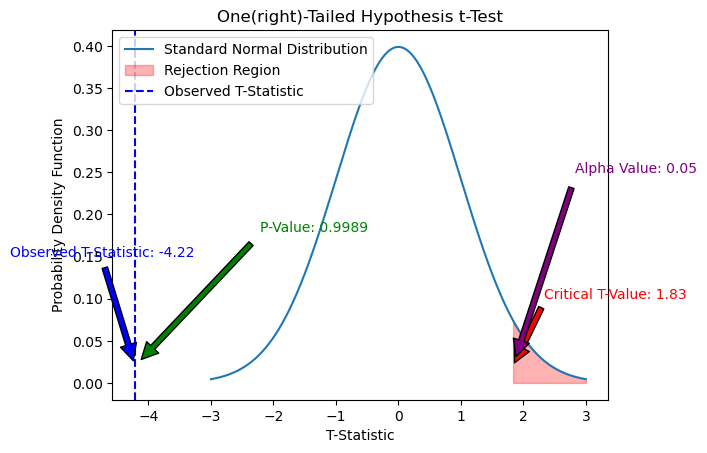

Fail to reject the null hypothesis: There is not enough evidence to conclude that the average lifespan is less than 2 hours.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Given data
sample_mean = 1.8
hypothesized_mean = 2
sample_std_dev = 0.15
sample_size = 10

# Calculate the T-Statistic
t_statistic = (sample_mean - hypothesized_mean) / (sample_std_dev / np.sqrt(sample_size))

# Determine Critical Value or P-Value
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha, df=sample_size - 1)
p_value = 1 - stats.t.cdf(t_statistic, df=sample_size - 1)

# Generate data for the standard normal distribution
x = np.linspace(-3, 3, 1000)
y = stats.norm.pdf(x)

# Plot the standard normal distribution
plt.plot(x, y, label='Standard Normal Distribution')

# Shade the rejection region
plt.fill_between(x, y, where=(x > t_critical), color='red', alpha=0.3, label='Rejection Region')

# Plot the observed t-statistic
plt.axvline(x=t_statistic, color='blue', linestyle='--', label='Observed T-Statistic')

# Add labels and title
plt.title('One(right)-Tailed Hypothesis t-Test')
plt.xlabel('T-Statistic')
plt.ylabel('Probability Density Function')

# Add annotations for z-score, critical score, p-value, and t-statistic
plt.annotate(f'Observed T-Statistic: {t_statistic:.2f}', xy=(t_statistic, 0.02), xytext=(t_statistic - 2, 0.15),
             arrowprops=dict(facecolor='blue', shrink=0.05), color='blue')
plt.annotate(f'Critical T-Value: {t_critical:.2f}', xy=(t_critical, 0.02), xytext=(t_critical + 0.5, 0.1),
             arrowprops=dict(facecolor='red', shrink=0.05), color='red')
plt.annotate(f'P-Value: {p_value:.4f}', xy=(t_statistic, 0.02), xytext=(t_statistic + 2, 0.18),
             arrowprops=dict(facecolor='green', shrink=0.05), color='green')
plt.annotate(f'Alpha Value: {alpha}', xy=(t_critical, 0.02), xytext=(t_critical + 1, 0.25),
             arrowprops=dict(facecolor='purple', shrink=0.05), color='purple')

# Display the legend
plt.legend()

# Display the plot
plt.show()


# Conclusion based on p-value and alpha
if p_value < alpha:
    print("Reject the null hypothesis: There is enough evidence to suggest that the average lifespan is less than 2 hours.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to conclude that the average lifespan is less than 2 hours.")

###  T-Test for Single Variance

consider a scenario where we want to test whether there is a significant difference in the average time spent on a website by two different user groups, Group A and Group B.

#In the context of an Independent Samples T-Test, "group" typically refers to different groups or categories within a single feature.

H0: μ1 = μ2 (The null hypothesis assumes that the means of two groups are equal.)

H1: μ1 ≠ μ2 (The alternative hypothesis suggests that the means of two groups are not equal.)


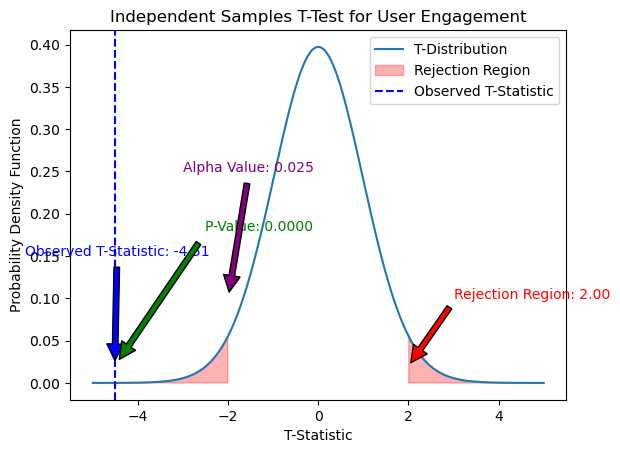

Reject the null hypothesis: There is enough evidence to suggest that the average time spent on the website differs between the two user groups.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Seed for reproducibility
np.random.seed(42)

# Generate time spent on website for Group A and Group B
group_a_time = np.random.normal(loc=10, scale=2, size=30)  # Mean = 10, Standard Deviation = 2
group_b_time = np.random.normal(loc=12, scale=2, size=30)  # Mean = 12, Standard Deviation = 2

# Independent Samples T-Test
t_statistic, p_value = stats.ttest_ind(group_a_time, group_b_time)

# Compare p-value with significance level (e.g., 0.05)
alpha = 0.05

# Generate data for the t-distribution
x = np.linspace(-5, 5, 1000)
y = stats.t.pdf(x, df=len(group_a_time) + len(group_b_time) - 2)

# Plot the t-distribution
plt.plot(x, y, label='T-Distribution')

# Shade the rejection region
critical_value = stats.t.ppf(1 - alpha / 2, df=len(group_a_time) + len(group_b_time) - 2)
plt.fill_between(x, y, where=(x > critical_value) | (x < -critical_value), color='red', alpha=0.3, label='Rejection Region')

# Plot the observed t-statistic
plt.axvline(x=t_statistic, color='blue', linestyle='--', label='Observed T-Statistic')

# Add labels and title
plt.title('Independent Samples T-Test for User Engagement')
plt.xlabel('T-Statistic')
plt.ylabel('Probability Density Function')

# Add annotations for t-statistic, critical score, p-value, and alpha
plt.annotate(f'Observed T-Statistic: {t_statistic:.2f}', xy=(t_statistic, 0.02), xytext=(t_statistic - 2, 0.15),
             arrowprops=dict(facecolor='blue', shrink=0.05), color='blue')
plt.annotate(f'Rejection Region: {critical_value:.2f}', xy=(critical_value, 0.02), xytext=(critical_value + 1, 0.1),
             arrowprops=dict(facecolor='red', shrink=0.05), color='red')
plt.annotate(f'P-Value: {p_value:.4f}', xy=(t_statistic, 0.02), xytext=(t_statistic + 2, 0.18),
             arrowprops=dict(facecolor='green', shrink=0.05), color='green')
plt.annotate(f'Alpha Value: {alpha/2}', xy=(-2, 0.1), xytext=(-3, 0.25),
             arrowprops=dict(facecolor='purple', shrink=0.05), color='purple')

# Display the legend
plt.legend()

# Display the plot
plt.show()

# Conclusion
if p_value < alpha:
    print("Reject the null hypothesis: There is enough evidence to suggest that the average time spent on the website differs between the two user groups.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to conclude that the average time spent on the website differs between the two user groups.")


### Paired Samples T-Test

consider a hypothetical example where we want to assess whether a new teaching method improves students' test scores. We collect test scores from the same group of students before and after implementing the new teaching method.

Null Hypothesis (H0): The mean difference in test scores before and after implementing the new teaching method is equal to zero.

Alternative Hypothesis (H1): The mean difference in test scores before and after implementing the new teaching method is not equal to zero.


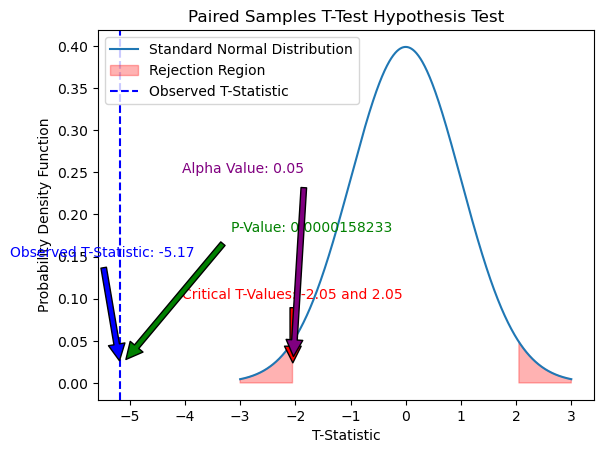

Reject the null hypothesis: There is enough evidence to suggest that the new teaching method improves test scores.


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Generate example data
np.random.seed(42)

# Before: Test scores before implementing the new teaching method
before_scores = np.random.normal(loc=70, scale=10, size=30)

# After: Test scores after implementing the new teaching method
# Assuming the new method leads to improvement, let's add a mean increase of 5 points
after_scores = before_scores + np.random.normal(loc=5, scale=5, size=30)

# Paired Samples T-Test
t_statistic, p_value = stats.ttest_rel(before_scores, after_scores)

# Generate data for the standard normal distribution
x = np.linspace(-3, 3, 1000)
y = stats.norm.pdf(x)

# Plot the standard normal distribution
plt.plot(x, y, label='Standard Normal Distribution')

# Shade the rejection region for a two-tailed test
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha/2, df=len(before_scores) - 1)
plt.fill_between(x, y, where=(x < -t_critical) | (x > t_critical),
                 color='red', alpha=0.3, label='Rejection Region')

# Plot the observed t-statistic
plt.axvline(x=t_statistic, color='blue', linestyle='--', label='Observed T-Statistic')

# Add labels and title
plt.title('Paired Samples T-Test Hypothesis Test')
plt.xlabel('T-Statistic')
plt.ylabel('Probability Density Function')

# Add annotations for t-statistic, critical score, p-value, and alpha
plt.annotate(f'Observed T-Statistic: {t_statistic:.2f}', xy=(t_statistic, 0.02), xytext=(t_statistic - 2, 0.15),
             arrowprops=dict(facecolor='blue', shrink=0.05), color='blue')
plt.annotate(f'Critical T-Values: {-t_critical:.2f} and {t_critical:.2f}',
             xy=(-t_critical, 0.02), xytext=(-t_critical - 2, 0.1),
             arrowprops=dict(facecolor='red', shrink=0.05), color='red')
plt.annotate(f'P-Value: {p_value:.10f}', xy=(t_statistic, 0.02), xytext=(t_statistic + 2, 0.18),
             arrowprops=dict(facecolor='green', shrink=0.05), color='green')
plt.annotate(f'Alpha Value: {alpha}', xy=(-t_critical, 0.02), xytext=(-t_critical - 2, 0.25),
             arrowprops=dict(facecolor='purple', shrink=0.05), color='purple')

# Display the legend
plt.legend()

# Display the plot
plt.show()

# Conclusion
if p_value < alpha:
    print("Reject the null hypothesis: There is enough evidence to suggest that the new teaching method improves test scores.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to suggest a significant improvement in test scores.")
